In [1]:
import joblib 

In [2]:
vars = joblib.load('my_variables.pkl')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")

# Model Implementation and Visualization

In [4]:
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt="g", cmap="coolwarm", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix', color='orange', fontsize=16)
    plt.show()

def NB_model(x_train, x_test, y_train, y_test):
    model = GaussianNB()
    model.fit(x_train, y_train)

    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)
    
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
    
    print("Classification Report for Training Set:\n")
    print(classification_report(y_train, train_predictions))
    
    print(f"Accuracy Score for Training Set: {train_accuracy}\n")
    
    print(f"ROC AUC Score for Training Set: {train_roc_auc}\n")

    print("Confusion Matrix for Training Set:\n")
    cm_train = confusion_matrix(y_train, train_predictions)
    plot_confusion_matrix(cm_train, labels=['Non-Fraud', 'Fraud'])
    
    print("\nClassification Report for Test Set:\n")
    print(classification_report(y_test, test_predictions))
    
    print(f"Accuracy Score for Test Set: {test_accuracy}\n")
    
    print(f"ROC AUC Score for Test Set: {test_roc_auc}\n")
    
    print("Confusion Matrix for Test Set:")
    cm_test = confusion_matrix(y_test, test_predictions)
    plot_confusion_matrix(cm_test, labels=['Non-Fraud', 'Fraud'])

# Model Cross Validation

In [11]:
def cross_val(x, y):
    
    gb = GaussianNB()

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    scoring = {'roc_auc': 'roc_auc', 
               'f1': 'f1',
               'accuracy': 'accuracy'}

    cv_results = cross_validate(gb, x, y, cv=skf, scoring=scoring)

    for i in range(skf.get_n_splits()):
        print(f"Fold {i+1}: ROC AUC: {cv_results['test_roc_auc'][i]}, F1 Score: {cv_results['test_f1'][i]}, Accuracy: {cv_results['test_accuracy'][i]}")

    mean_roc_auc = cv_results['test_roc_auc'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    mean_accuracy = cv_results['test_accuracy'].mean()

    print("\nMean ROC AUC:", mean_roc_auc)
    print("Mean F1 Score:", mean_f1)
    print("Mean Accuracy:", mean_accuracy)

# Model Performance After Feature Scaling

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.83      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.91      0.55    227845
weighted avg       1.00      0.98      0.99    227845

Accuracy Score for Training Set: 0.978480984880072

ROC AUC Score for Training Set: 0.9596201085046555

Confusion Matrix for Training Set:



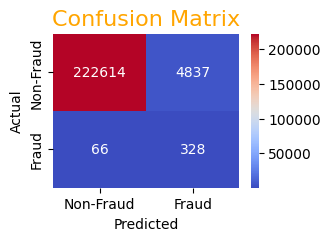


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy Score for Test Set: 0.9776342122818721

ROC AUC Score for Test Set: 0.9671032136827719

Confusion Matrix for Test Set:


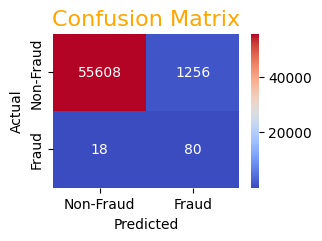

In [6]:
NB_model(vars['x_train'], vars['x_test'], vars['y_train'], vars['y_test'])

# Model Performance After Feature Transformation

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.06      0.83      0.12       394

    accuracy                           0.98    227845
   macro avg       0.53      0.90      0.55    227845
weighted avg       1.00      0.98      0.99    227845

Accuracy Score for Training Set: 0.9780069784283175

ROC AUC Score for Training Set: 0.9593069211738738

Confusion Matrix for Training Set:



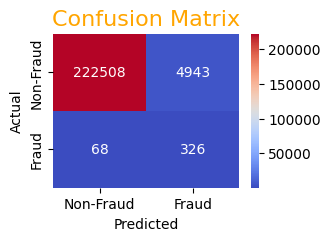


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.81      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.89      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Accuracy Score for Test Set: 0.9776342122818721

ROC AUC Score for Test Set: 0.9703049991099422

Confusion Matrix for Test Set:


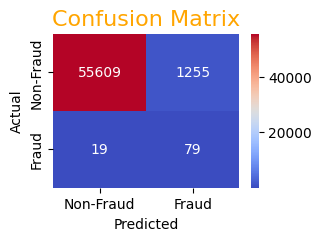

In [8]:
NB_model(vars['x_train_pt'], vars['x_test_pt'], vars['y_train'], vars['y_test'])

# Model Performance After Implementing LDA

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.83      0.80      0.81       394

    accuracy                           1.00    227845
   macro avg       0.91      0.90      0.91    227845
weighted avg       1.00      1.00      1.00    227845

Accuracy Score for Training Set: 0.9993636024490333

ROC AUC Score for Training Set: 0.9711465828742005

Confusion Matrix for Training Set:



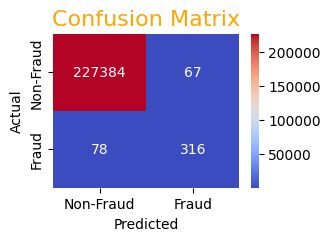


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.80      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score for Test Set: 0.9992802219023208

ROC AUC Score for Test Set: 0.9709442795125929

Confusion Matrix for Test Set:


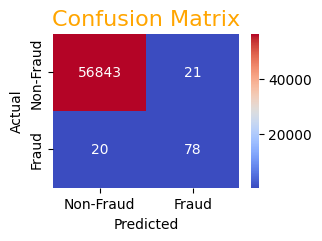

In [9]:
NB_model(vars['x_train_lda'], vars['x_test_lda'], vars['y_train'], vars['y_test'])

# Model Performance With Cross Validation

In [12]:
cross_val(vars['x'], vars['y'])

Fold 1: ROC AUC: 0.9531205340782747, F1 Score: 0.12121212121212122, Accuracy: 0.9791264351673045
Fold 2: ROC AUC: 0.96663316420452, F1 Score: 0.11519777931991672, Accuracy: 0.977616656718514
Fold 3: ROC AUC: 0.9696885137819613, F1 Score: 0.1189111747851003, Accuracy: 0.9784062779796703
Fold 4: ROC AUC: 0.9558927346680367, F1 Score: 0.10379241516966069, Accuracy: 0.9763522410070048
Fold 5: ROC AUC: 0.9570977433408691, F1 Score: 0.11573747353563867, Accuracy: 0.9780024929337617

Mean ROC AUC: 0.9604865380147324
Mean F1 Score: 0.1149701928044875
Mean Accuracy: 0.977900820761251


# Model Performance After Implementing SMOTE

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92    284315
           1       0.97      0.85      0.91    284315

    accuracy                           0.91    568630
   macro avg       0.92      0.91      0.91    568630
weighted avg       0.92      0.91      0.91    568630

Accuracy Score for Training Set: 0.9149271054991822

ROC AUC Score for Training Set: 0.9497072182702879

Confusion Matrix for Training Set:



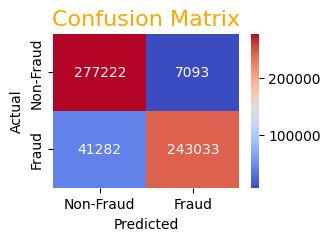


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.87      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy Score for Test Set: 0.9745093220041431

ROC AUC Score for Test Set: 0.9675195310256911

Confusion Matrix for Test Set:


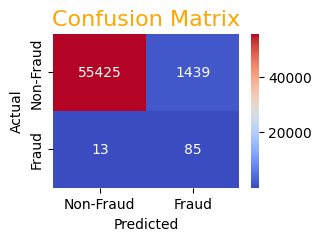

In [13]:
NB_model(vars['x_smote'], vars['x_test'], vars['y_smote'], vars['y_test'])

# Model Performance After Implementing ADASYN

Classification Report for Training Set:

              precision    recall  f1-score   support

           0       0.65      0.96      0.77    284315
           1       0.91      0.48      0.63    284319

    accuracy                           0.72    568634
   macro avg       0.78      0.72      0.70    568634
weighted avg       0.78      0.72      0.70    568634

Accuracy Score for Training Set: 0.7188332037831012

ROC AUC Score for Training Set: 0.8500447617490408

Confusion Matrix for Training Set:



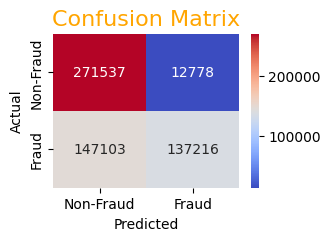


Classification Report for Test Set:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.91      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Accuracy Score for Test Set: 0.9551806467469541

ROC AUC Score for Test Set: 0.9696924563297463

Confusion Matrix for Test Set:


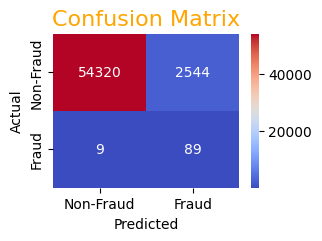

In [14]:
NB_model(vars['x_adasyn'], vars['x_test'], vars['y_adasyn'], vars['y_test'])